# Loading a PostGIS Database

Often times, you can accumulate data from multiple sources and you want to persist it into a multilayer geodatabase.
While Shapefiles and GeoDB Files support this, they are inherently *single user*.
When you want to facilitate a *multi-user* environment or more advanced geospatial analytics via SQL,
instead of programming, PostGIS may be the solution you are looking for!

You have seen in previous courses and labs for this course how to query PostgreSQL and even PostGIS data.
In this practice, we are going to load PostGIS data!


# Data Sets

For this practice, you will build on what you have learned and your previous data carpentry skills to acquire, stage, ingest, and persist various datasets.

We will be accessing data linked at the US Government's Geospatial Platform: https://www.geoplatform.gov/


All the datasets will be in different formats. Some you may have seen, some will be new.
* [New Mexico Populated Places (GNIS), 2009](http://gstore.unm.edu/apps/rgis/datasets/c73b5e4d-fd64-4a2c-8a93-668e47d982d8/gnis_nm_poppl09.derived.csv)
* [Bureau of Land Management Land Grant Boundaries](http://gstore.unm.edu/apps/rgis/datasets/3d23ac95-2b28-4c1f-b5cc-b656133a018f/land_grants.original.zip/)

In the previous practice, you acquired these data sets.
If, for some reason you removed or cleaned up your data, please re-acquire using the code you wrote in the [Geospatial Data Carpentry Notebook](./GeoCarpentry.ipynb)

In [1]:
import pandas as pd

df=pd.read_csv('../temp/gnis_nm_poppl09.csv')

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SOURCE_LAT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Object_ID,1702.0,1002.663337,638.115054,1.000000,426.250000,987.500000,1456.750000,2.217000e+03
FEATURE_ID,1702.0,951482.960047,218113.465934,885549.000000,899686.250000,906184.000000,918247.500000,2.413665e+06
STATE_NUME,1702.0,35.000000,0.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01
COUNTY_NUM,1702.0,32.477086,18.103702,1.000000,17.000000,35.000000,47.000000,6.100000e+01
PRIM_LAT_D,1702.0,34.714688,1.441798,31.333996,33.545841,35.074770,35.840867,3.699862e+01
PRIM_LONG1,1702.0,-106.211466,1.524765,-109.041204,-107.253004,-106.228775,-105.276537,-1.030513e+02
SOURCE_LON,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOURCE_L_1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOURCE_L_2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see from the table above that we have the following columns:
 * SOURCE_LAT
 * Object_ID
 * FEATURE_ID
 * STATE_NUME
 * COUNTY_NUM
 * PRIM_LAT_D
 * PRIM_LONG1
 * SOURCE_LON
 * SOURCE_L_1
 * SOURCE_L_2
 * ELEVATION
 * observed

Read about this dataset [here](https://catalog.data.gov/dataset/new-mexico-populated-places-gnis-2009).

From some inspection, and digging into [related links](https://geonames.usgs.gov/) we can understand that *FEATURE_ID*, *PRIM_LAT_D*, *PRIM_LONG1*, and *ELEVATION* would be useful to have a map of populated places (location and elevation).

## Defining a PostGIS Table

Please review the [DBASE information sheet](../../resources/DSA_Student_DBASE_HotTo.pdf) for details on connecting to `dsa_student` PostGIS database using the `psql` CLI.  
Please review the [PostGIS information Sheet](../../resources/PostGIS_Info_Sheet.pdf) for details on creating a PostGIS table.

 * **NOTE:** Substitute your actual MU SSO for in the `SSO` below. 
 
```SQL
CREATE TABLE souleymanesaleya.new_mexico_populated_places (
  feature_id INT,
  elevation real,
  CONSTRAINT pk_new_mexico_populated_places
    PRIMARY KEY (feature_id)
);
SELECT AddGeometryColumn('souleymanesaleya','new_mexico_populated_places','coords',4326,'POINT',2);
CREATE INDEX idx_new_mexico_populated_places_point ON souleymanesaleya.new_mexico_populated_places USING GIST (coords);
```

### Result Check:

```SQL
dsa_student=# \d new_mexico_populated_places 
  Table "scottgs.new_mexico_populated_places"
   Column   |         Type         | Modifiers 
------------+----------------------+-----------
 feature_id | integer              | not null
 elevation  | real                 | 
 coords     | geometry(Point,4326) | 
Indexes:
    "pk_new_mexico_populated_places" PRIMARY KEY, btree (feature_id)
    "idx_new_mexico_populated_places_point" gist (coords)

```

## Task : Reduce the data frame to just the desired columns

##### ('FEATURE_ID','ELEVATION','PRIM_LONG1','PRIM_LAT_D')

In [2]:
df.columns

Index(['SOURCE_LAT', 'Object_ID', 'FEATURE_ID', 'FEATURE_NA', 'FEATURE_CL',
       'STATE_ALPH', 'STATE_NUME', 'COUNTY_NAM', 'COUNTY_NUM', 'PRIMARY_LA',
       'PRIM_LONG_', 'PRIM_LAT_D', 'PRIM_LONG1', 'SOURCE_LON', 'SOURCE_L_1',
       'SOURCE_L_2', 'ELEVATION', 'MAP_NAME', 'DATE_CREAT', 'DATE_EDITE',
       'observed'],
      dtype='object')

In [3]:
## M2:P2:Cell01
# Create a DF with limited original data
# ---------- Add your code below this line
df.drop(df.columns[[0,1,3,4,5,6,7,8,9,10,13,14,15,17,18,19,20]],axis=1,inplace=True)

# ----- Then check data types and ensure you have what you expect
df.dtypes

FEATURE_ID    float64
PRIM_LAT_D    float64
PRIM_LONG1    float64
ELEVATION     float64
dtype: object

In [4]:
df.head()

,FEATURE_ID,PRIM_LAT_D,PRIM_LONG1,ELEVATION
0,2413618.0,34.607173,-106.537676,1701.0
1,2375434.0,34.582778,-106.329722,2123.0
2,2375433.0,34.611944,-106.340000,2107.0
3,2055903.0,35.082269,-106.381135,1931.0
4,2413664.0,34.649593,-106.734030,1471.0


#### Load your password into Memory

In [5]:
import getpass
mypasswd = getpass.getpass()


········


#### Get a connection Object to the PostGIS database

In [7]:
import psycopg2
import numpy
from psycopg2.extensions import adapt, register_adapter, AsIs

connection = psycopg2.connect(database = 'dsa_student', 
                              user = 'souleymanesaleya', 
                              host = 'dbase.dsa.missouri.edu',
                              password = mypasswd)

#### Unload your password from memory

In [8]:
del mypasswd


## Task: Load data into database table


### Review the code below, looking at the structure

### Then, review these API links:

 * http://initd.org/psycopg/docs/extensions.html#sql-adaptation-protocol-objects
 * PostGIS Documentation for creating points
   * [GeomFromText](http://www.postgis.net/docs/ST_GeomFromText.html)
   * [MakePoint](https://postgis.net/docs/ST_MakePoint.html)
   * [PointFromText](https://postgis.net/docs/ST_PointFromText.html)
   
We are going to use *ST_MakePoint* as it is considered the fastest (most efficient).
Along with that, we will need to use the function [*ST_SetSRID*](https://postgis.net/docs/ST_SetSRID.html) to ensure the data is in the `4326` spatial reference sytem.

##### Below, we have provided the structure and some starter code.

 * Finally, [read about prepared statements](http://initd.org/psycopg/articles/2012/10/01/prepared-statements-psycopg/)


In [9]:
## M2:P2:Cell02
# Magic adapters for the Numpy Fun of Pandas
register_adapter(numpy.int64,AsIs)
register_adapter(numpy.float64,AsIs)

INSERT_SQL = 'INSERT INTO souleymanesaleya.new_mexico_populated_places '
INSERT_SQL += ' (feature_id, elevation, coords) values(%s, %s , ST_SetSRID(ST_MakePoint(%s,%s), 4326))'
#INSERT_SQL += 'ST_SetSRID(ST_MakePoint(PRIM_LONG1, PRIM_LAT_D), 4326) As coords'
# Add the rest of the insert statement that includes ST_MakePoint


# Note: The Commit Will Be Automatic after this with clause
with connection, connection.cursor() as cursor:
    for row in df.itertuples():  # pull each row as a tuple
        
        # This is an indexed Tuple
        print(row) 
        
        # TODO: This is needed to remove the index element
        data = df.reset_index(drop=True)# Add your code
    
        print(data)

        # TODO: Insert the row
        cursor.execute(INSERT_SQL,data)
        #cursor.execute(  <add_code>  )
        


Pandas(Index=0, FEATURE_ID=2413618.0, PRIM_LAT_D=34.607172999999996, PRIM_LONG1=-106.537676, ELEVATION=1701.0)
      FEATURE_ID  PRIM_LAT_D  PRIM_LONG1  ELEVATION
0      2413618.0   34.607173 -106.537676     1701.0
1      2375434.0   34.582778 -106.329722     2123.0
2      2375433.0   34.611944 -106.340000     2107.0
3      2055903.0   35.082269 -106.381135     1931.0
4      2413664.0   34.649593 -106.734030     1471.0
5      2038782.0   36.002801 -106.057801     1715.0
6      2055902.0   35.065325 -106.445023     1831.0
7      2038776.0   32.776464 -108.154489     1821.0
8      2038775.0   35.494211 -105.266953     2000.0
9      2013470.0   33.005642 -105.992213     1364.0
10     2013821.0   36.295864 -103.202995     1485.0
11     1987911.0   32.664536 -105.998873     1221.0
12     1987529.0   32.911485 -105.535817     2154.0
13     1699884.0   35.233375 -106.664472     1610.0
14     1987485.0   35.490857 -108.421464     2114.0
15      938812.0   35.825861 -105.904465     2151.0
16   

KeyError: 0

In [10]:
print(row)

Pandas(Index=0, FEATURE_ID=2413618.0, PRIM_LAT_D=34.607172999999996, PRIM_LONG1=-106.537676, ELEVATION=1701.0)


#### Check for Data:

```SQL
dsa_student=# select count(*) from souleymanesaleya.new_mexico_populated_places;
 count 
-------
  1702
(1 row)
```

#### Peak at it
```SQL
dsa_student=# select feature_id,elevation, ST_AsText(coords)
dsa_student-# from souleymanesaleya.new_mexico_populated_places 
dsa_student-# limit 5;
 feature_id | elevation |          st_astext           
------------+-----------+------------------------------
    2413618 |      1701 | POINT(-106.537676 34.607173)
    2375434 |      2123 | POINT(-106.329722 34.582778)
    2375433 |      2107 | POINT(-106.34 34.611944)
    2055903 |      1931 | POINT(-106.381135 35.082269)
    2413664 |      1471 | POINT(-106.73403 34.649593)
(5 rows)
```

# Your Turn: A second data set

The second dataset we will work with is [http://gstore.unm.edu/apps/rgis/datasets/3d23ac95-2b28-4c1f-b5cc-b656133a018f/land_grants.original.zip](http://gstore.unm.edu/apps/rgis/datasets/3d23ac95-2b28-4c1f-b5cc-b656133a018f/land_grants.original.zip).

### Task: Explore the layers in the file, then load the data into a GeoPanda data frame.

In [3]:
## M2:P2:Cell03
import fiona
GEODATA_FILE = '../temp/land_grants'
numLayers = len(fiona.listlayers(GEODATA_FILE))

for i, name in enumerate(fiona.listlayers(GEODATA_FILE)):
    with fiona.open(GEODATA_FILE, layer=i) as current_layer:
        print("[{}/{}] Layer {} has {} features".format((i+1),numLayers,name,len(current_layer)))




[1/1] Layer land_grants has 222 features


In [4]:
## M2:P2:Cell04
import geopandas as gpd
from geopandas import GeoDataFrame
g_df = gpd.read_file(GEODATA_FILE)# Add code here


In [5]:
g_df.head()

,AREA,GRANT_CONF,GRANT_NAME,LAND_GRANT,LAND_GRA_1,PERIMETER,SURVEY_APP,geometry
0,2.004791e+09,1860-06-21,TIERRA AMARILLA,2,19,196213.113905,1875-12-20,"POLYGON ((338682.3310473557 4095575.192740339,..."
1,8.906534e+08,1860-06-21,SANGRE DE CRISTO,3,49,150193.079600,1876-04-07,"POLYGON ((480365.5636026052 4094378.445603433,..."
2,5.899487e+09,1860-06-21,BEAUBIEN AND MIRANDA,4,50,340036.041390,1878-12-20,"POLYGON ((480365.5636026052 4094378.445603433,..."
3,6.310151e+07,1869-03-03,ANTOINE LEROUX,5,24,42416.184889,1877-06-05,"POLYGON ((449858.0004298416 4043898.676425322,..."
4,7.432813e+07,1900-12-18,ARROYO HONDO,6,21,42576.378483,1900-12-18,"POLYGON ((436971.8898926409 4043300.98950113, ..."


In [5]:
print(g_df.crs)

{'init': 'epsg:26913'}


### NOTE: The EPSG (Coordinate Reference System) is 26913!

We want to have it in 4326 so it is in the most common CRS and compatible with our PostGIS data.

### Task: Use the GeoPandas built in functions for convert to CRS 4326

In [6]:
## M2:P2:Cell05
#geo_df = GeoDataFrame()# Your code here
crs={'init': 'epsg:4326'}
g_df = GeoDataFrame(g_df, crs=crs)

In [ ]:
#g_df.to_crs({'init': 'epsg:4326'})

In [7]:
g_df.crs

{'init': 'epsg:4326'}

### Task: Define your table, geometry column, and indexing

Write your SQL Statements below, then copy-and-paste into terminal database command line.

Note that you should end up with a **coords** column that is a SRID=4326 POLYGON of 2-D (Lon,Lat).

In [1]:
import getpass
mypasswd = getpass.getpass()

········


In [2]:
import psycopg2
import numpy
from psycopg2.extensions import adapt, register_adapter, AsIs

connection = psycopg2.connect(database = 'dsa_student', 
                              user = 'souleymanesaleya', 
                              host = 'dbase.dsa.missouri.edu',
                              password = mypasswd)
del mypasswd

---

## Pause: 

Think about what a polygon is relative to a point.
Imagine the programing "*fun*" of code-constructing Polygons for Insert statements

Because it will be the opposite of fun, we will use the friendly *ST_GeomFromText* function.
The challenge is how to build that WKT text that PostGIS wants?
Since a GeoSeries is a series of Shapely geometries, we can look to that [API](http://shapely.readthedocs.io/en/stable/manual.html).
Then, for an element of the tuple that is the Shapely Geometry, we can extract the WKT.

### Task: Load the data including the Polygon.  
#### The SQL provided is ready to use if your table columns match up.


In [13]:
## M2:P2:Cell06
# Magic adapters for the Numpy Fun of Pandas
register_adapter(numpy.int64,AsIs)
register_adapter(numpy.float64,AsIs)

# Note, ID is left off because it is SERIAL type and auto-incremented
INSERT_SQL = 'INSERT INTO souleymanesaleya.new_mexico_land_grants '
# This next line may need an edit based on your table construction.
INSERT_SQL += ' (area,grant_conf,grant_name,land_grant,land_gra_1,perimeter,survey_app,coords) '
INSERT_SQL += ' values (%s,%s,%s,%s,%s,%s,%s,ST_GeomFromText(%s, 4326))'

# Note: The Commit Will Be Automatic after this with clause
with connection, connection.cursor() as cursor:
    for row in g_df.itertuples():  # pull each row as a tuple
        
        # This is an indexed Tuple
        print(row) 
        
        # This is needed to remove the index element
        #data = g_df.reset_index(drop=True)# Add your code here
        data=(row.AREA,row.GRANT_CONF,row.GRANT_NAME,row.LAND_GRANT,row.LAND_GRA_1,row.PERIMETER,row.SURVEY_APP,row.geometry.wkt)
        #print(data)
        cursor.execute(INSERT_SQL,data)


### Verify

```SQL
dsa_student=# select count(*) from scottgs.new_mexico_land_grants;
 count 
-------
   222
(1 row)
```

```DSA
dsa_student=# select id,grant_name, grant_conf,st_area(coords) from scottgs.new_mexico_land_grants limit 5;
 id |      grant_name      | grant_conf |     st_area      
----+----------------------+------------+------------------
  1 | TIERRA AMARILLA      | 1860-06-21 | 2004791148.87488
  2 | SANGRE DE CRISTO     | 1860-06-21 | 890653352.742407
  3 | BEAUBIEN AND MIRANDA | 1860-06-21 | 5899487289.42897
  4 | ANTOINE LEROUX       | 1869-03-03 | 63101507.3669469
  5 | ARROYO HONDO         | 1900-12-18 |  74328127.180984
(5 rows)
```

In [ ]:
con = psycopg2.connect(database="dsa_ro", user="dsa_ro_user",password="readonly",host="dbase")

# NOTE  (CountryName, Longitude, Latitude, Population in 2005, the polynomial country border)
sql= "select name, lon, lat, pop2005, the_geom from geospatial.country_borders"

countries=gpd.GeoDataFrame.from_postgis(sql,con,geom_col='the_geom' )
# plotting stuff
countries.plot(figsize=(15,15))

In [15]:
## M2:P2:Cell07

check_sql= "select id,grant_name, grant_conf, coords from souleymanesaleya.new_mexico_land_grants"


gdf= gpd.GeoDataFrame.from_postgis(check_sql,connection,geom_col='coords')# Add code here
gdf.head()

,id,grant_name,grant_conf,coords
0,1,TIERRA AMARILLA,1860-06-21,"POLYGON ((338682.3310473557 4095575.192740339,..."
1,2,SANGRE DE CRISTO,1860-06-21,"POLYGON ((480365.5636026052 4094378.445603433,..."
2,3,BEAUBIEN AND MIRANDA,1860-06-21,"POLYGON ((480365.5636026052 4094378.445603433,..."
3,4,ANTOINE LEROUX,1869-03-03,"POLYGON ((449858.0004298416 4043898.676425322,..."
4,5,ARROYO HONDO,1900-12-18,"POLYGON ((436971.8898926409 4043300.98950113, ..."


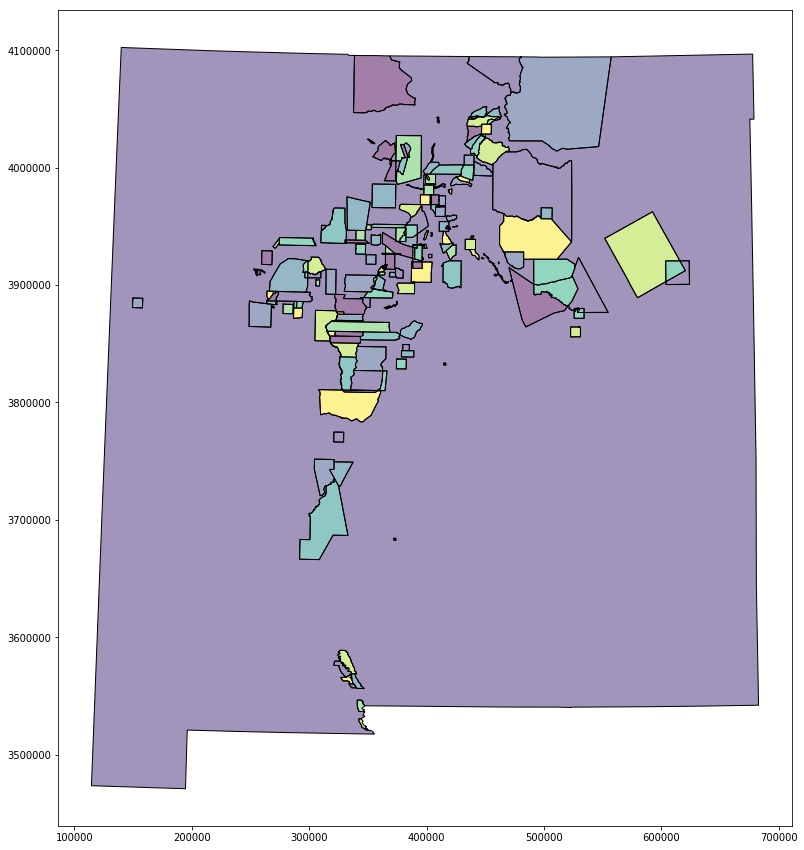

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline


gdf.plot(figsize=(15,15))

## Write a little Spatial SQL

Write an SQL Query to Count the number of populate places within each Land Grant polygon, showing the only the top 10!

Write your SQL below and Copy-Paste into the CLI for the database.
Also, please past your results in the cell as well.

#### Expected Output:

```SQL
 id  |         grant_name          | count 
-----+-----------------------------+-------
 216 | NON GRANT                   |  1176
  29 | MORA                        |    47
   3 | BEAUBIEN AND MIRANDA        |    44
  66 | LAS VEGAS                   |    30
 191 | TOME                        |    15
   1 | TIERRA AMARILLA             |    14
 138 | SAN MIGUEL DEL BADO TRACT 2 |    12
 198 | SEVILLETA                   |    11
  49 | SANTA CLARA PUEBLO          |    11
 203 | PEDRO ARMENDARIZ NO. 33     |    10
(10 rows)
```

# Save Your Notebook
## Then Notebook Menu: File > Close and Halt